In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd

from IPython.core.display import Image

from sklearn.svm import SVC

import matplotlib.pyplot as plt

plt.style.use('seaborn-white')
%matplotlib inline

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Support Vector Machines
Week 9 | Day 1

## You probably saw this last week...
<img src="http://i.imgur.com/GCD2sdj.png">

## Support Vector Machines!
<img src="http://i.imgur.com/eoj1jV3.png">

## Recap of logistic regression

We've previously seen how we can use a logistic regression to estimate class probabilities. 
In the same way a linear regression attempts to fit a model by minimizing the RSS, a logistic regression uses something called the MLE (maximum likelihood estimate) to calculate how likely it is for a sample to be in a class given its set of features.

<img src="http://i.imgur.com/77t040X.png">

<img src="http://i.imgur.com/ZxV0non.png">

## So a probabalistic approach is one way to do it

But, that isn't the only way to approach the problem. We're now going to look at a way to approach it geometrically...

## How can we separate data?

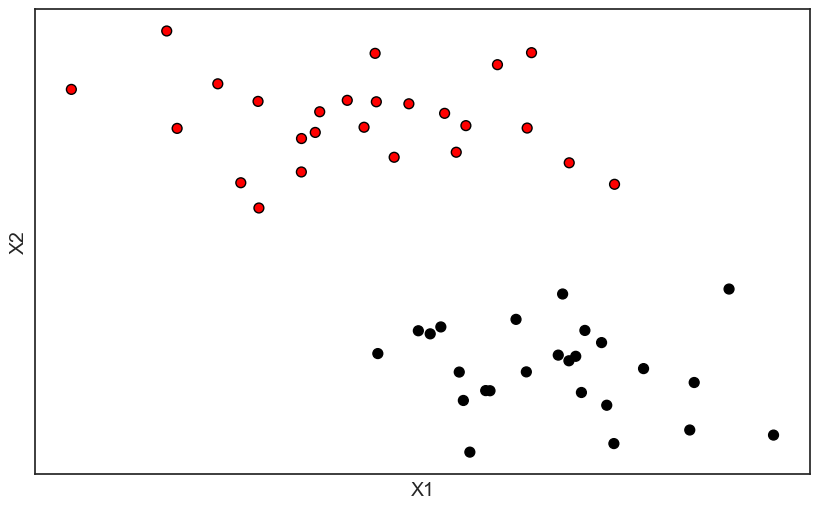

In [2]:
from sklearn.datasets.samples_generator import make_blobs

plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1);

## Like this maybe?

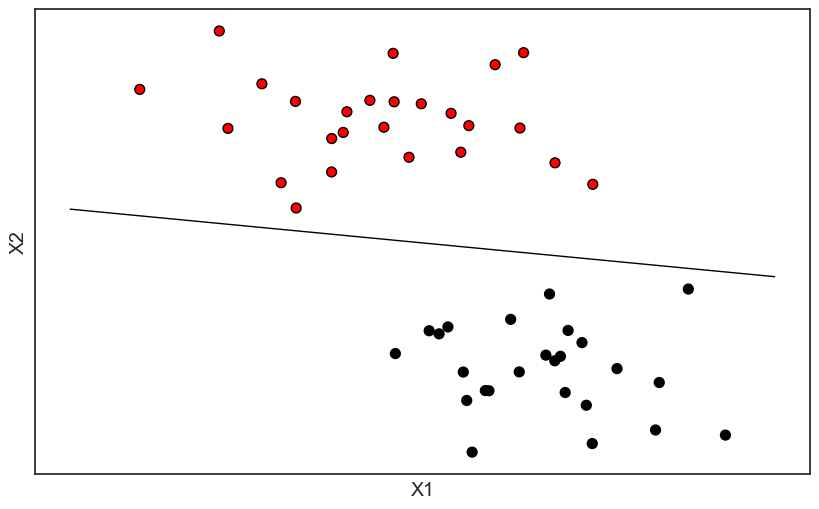

In [3]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1);

xfit = np.linspace(-1, 3.5)

for m, b in [(-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

## Duh, that was easy...are we done?

## No.

## What about this?

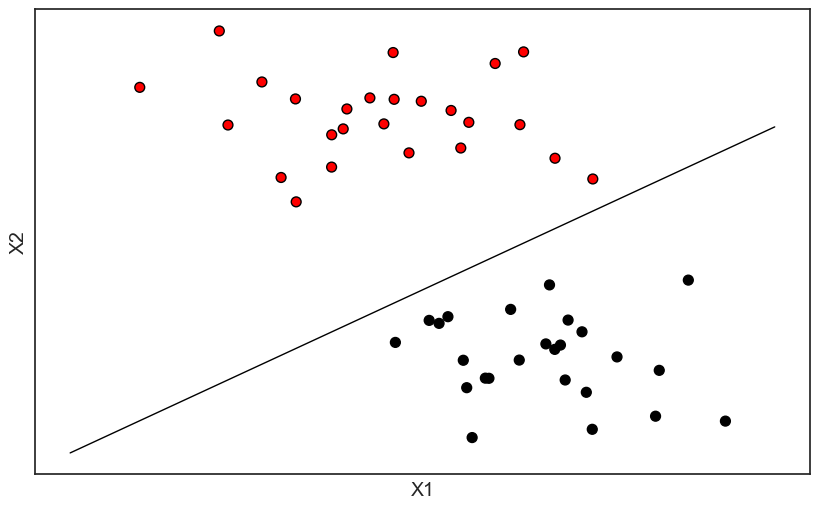

In [4]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1);

xfit = np.linspace(-1, 3.5)

for m, b in [(1, 0.65)]:
    plt.plot(xfit, m * xfit + b, '-k')

## Uh, sure, I guess that works too...

## Or like this?

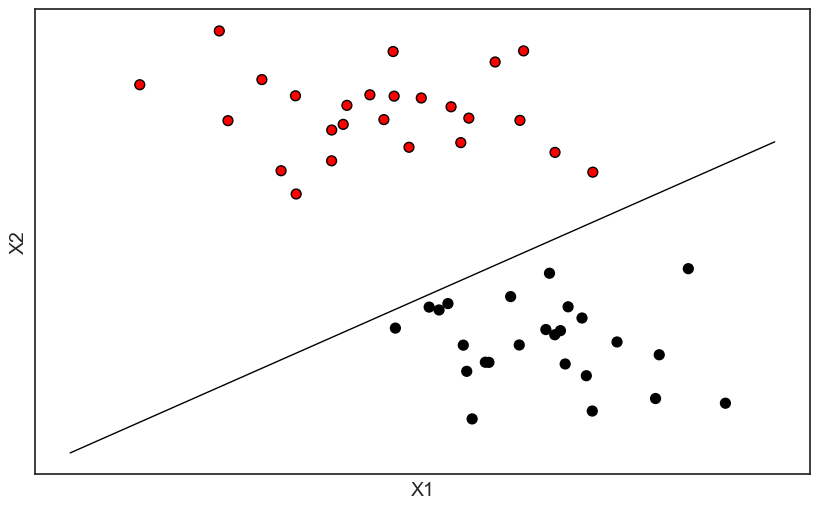

In [5]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1);

xfit = np.linspace(-1, 3.5)

for m, b in [(1.0, .37)]:
    plt.plot(xfit, m * xfit + b, '-k')

## Or how about these?

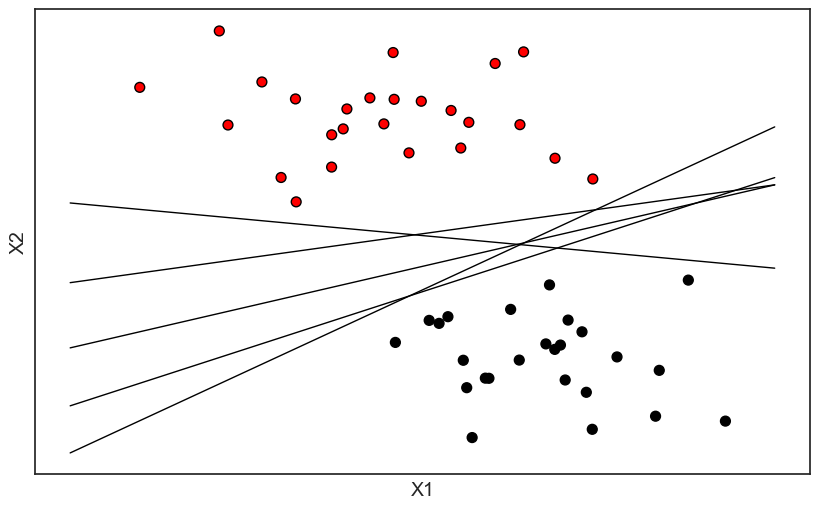

In [6]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1);

xfit = np.linspace(-1, 3.5)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9), (.3, 2.3), (.7, 1)]:
    plt.plot(xfit, m * xfit + b, '-k')

## Uh, great. You can draw lots of lines. Who cares? Just draw one and be done with it already.

## But, really though...Which one is best?

## So glad you asked...

## Why?

## Because that is what what a support vector does.

## So, how does it do it?

## Well, we have this...

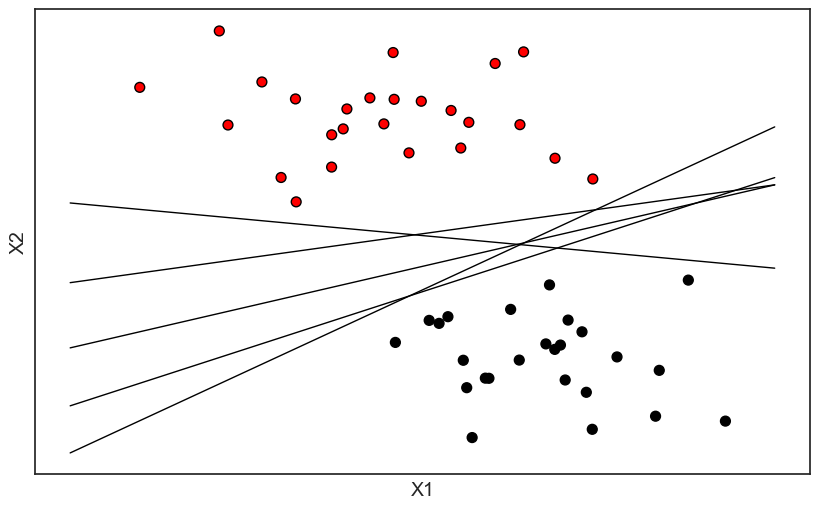

In [7]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1);

xfit = np.linspace(-1, 3.5)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9), (.3, 2.3), (.7, 1)]:
    plt.plot(xfit, m * xfit + b, '-k')

## But what if we took each of those lines and made them really fat?

## How fat?

## Up until the were jammed inbetween the points on either side like this...

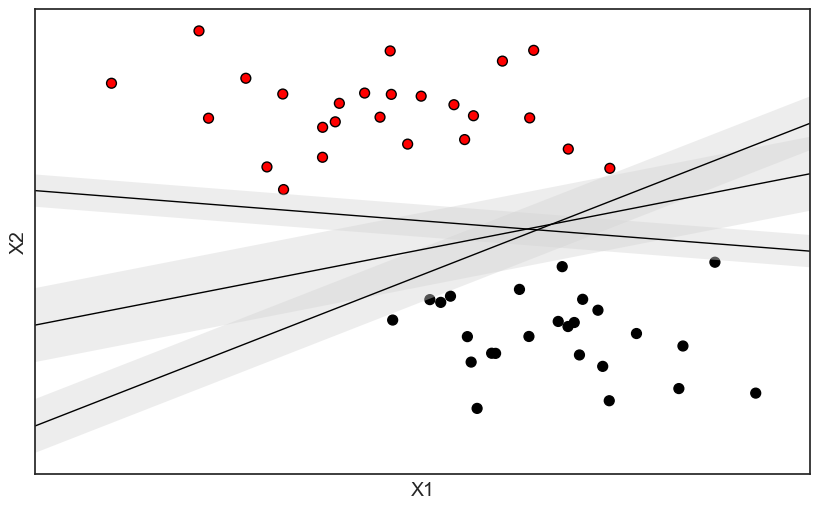

In [8]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1);

xfit = np.linspace(-1, 3.5)

for m, b, d in [(1, 0.60, 0.4), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.24)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='lightgrey', alpha=0.4)

plt.xlim(-1, 3.5);

#### If did that and tried a bunch of lines, we could compare the lines to find the fattest line we could draw between each class.

## That is exactly what a support vector machine is.

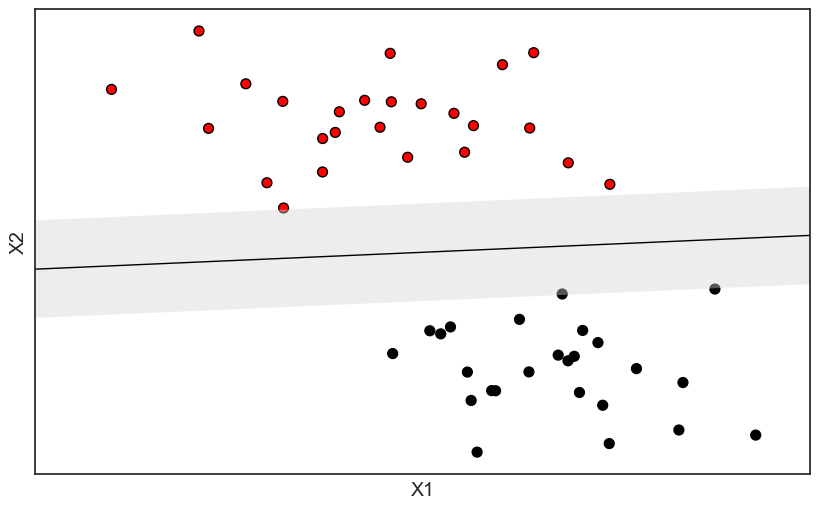

In [9]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1);

xfit = np.linspace(-1, 3.5)

for m, b, d in [(.1, 2.4, 0.65)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='lightgrey', alpha=0.4)

plt.xlim(-1, 3.5);

<small>We can now see that the center line is the "thickest" of the three. If this was
the thickest of all possible lines, we would have maximized the margins between
the decision boundary between and the two classes. The margins being the points
nearest to the decision or separating boundary. Those points on the edge are called the "support vectors" as they appear to support that plane. 

In the terminology of SVMs, we have a created a **maximum margin hyperplane**
(an n-dimensional plane).</small>

## Check: How sensitive to outliers would a support vector machine be?

## Let's use sklearn to fit one

In [10]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Now we can visualize it

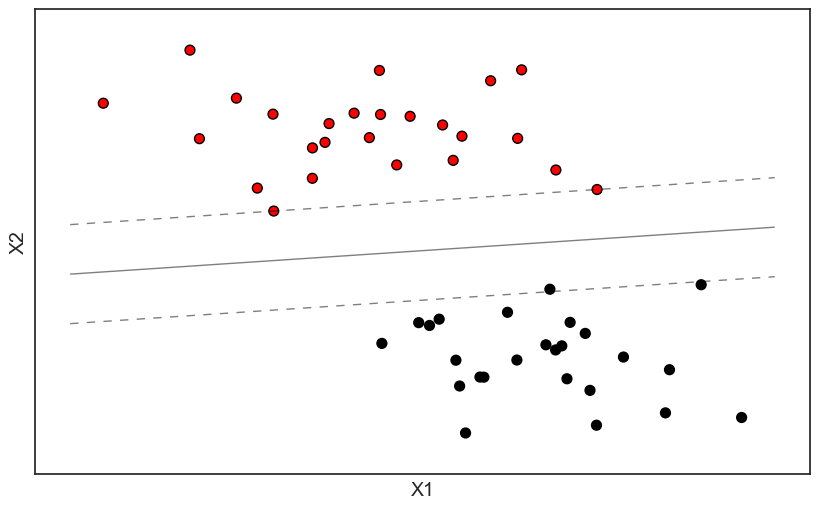

In [11]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.array([xi, yj]).reshape(1, -1))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1)

plot_svc_decision_function(clf);

## And, here, you can see the support vectors

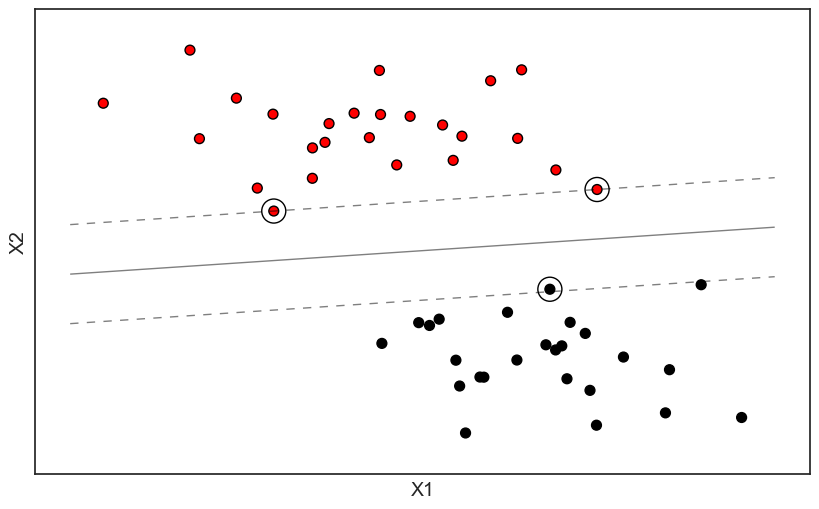

In [12]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, facecolors='none', cmap=plt.cm.flag, edgecolors='black', linewidth=1);

## That's amaze! We're done now. This works for everything since we can draw a nice clean line between everything, right?

## Not

## a

## Chance.

## What do we do if the data is not linearly separable?

### Cut us some slack (variables)..

<br>If we cannot linearly separate our data, we can still attempt to maximize the margin but subject to a a penalty for each misclassified example. This says we are willing to make a 
tradeoff between the size of the margin and the misclassified samples. This is called a
**soft margin** classifier as opposed to a **hard margin** one.

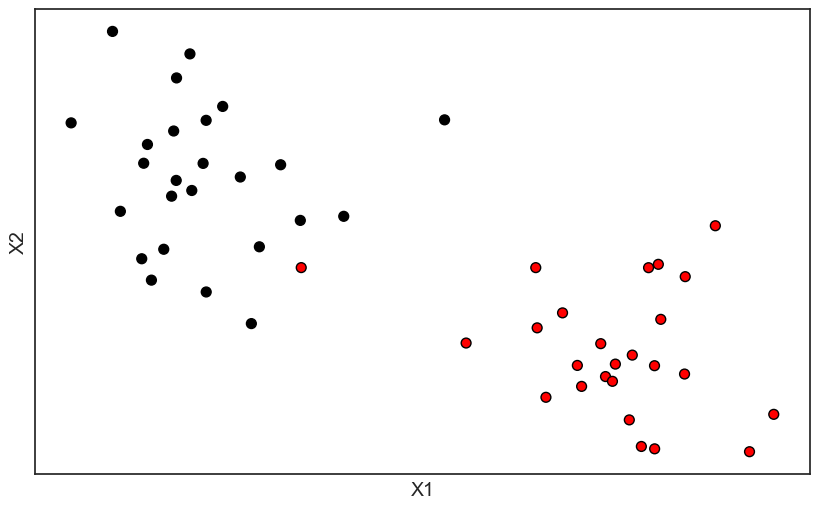

In [13]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=73, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1);

We can adjust this penalty through the C parameter in sklearn

The default value is 1

## Let's see how changing this penalty affects the model

In [14]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

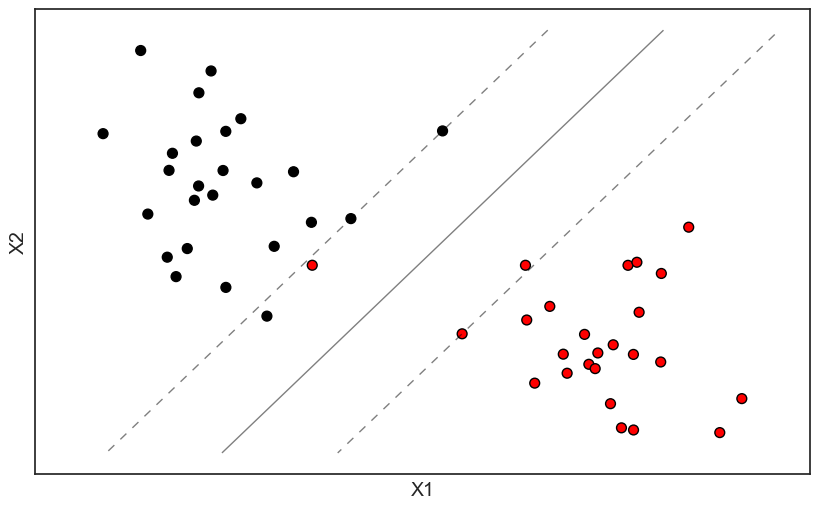

In [15]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.array([xi, yj]).reshape(1, -1))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1)

plot_svc_decision_function(clf);

You can see we have the one point misclassified and the margin is roughly the same.

## Let's reduce C to .15 to see what happens

In [39]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=.01)
clf.fit(X, y)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

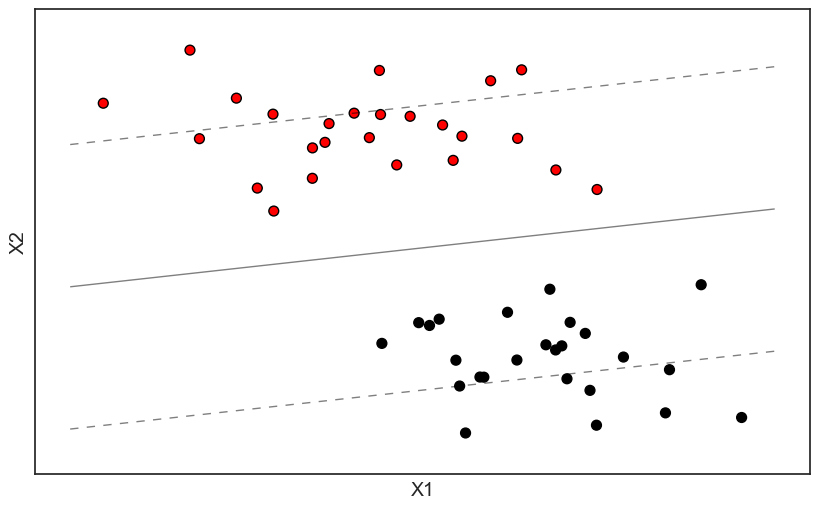

In [40]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.array([xi, yj]).reshape(1, -1))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1)

plot_svc_decision_function(clf);

## Exercise: 

By reducing C, are we penalizing the errors more or less?

Take the code from the cells above and change the C parameter - how does the hyperplane change as you change C?

## And the support vectors we can again see here

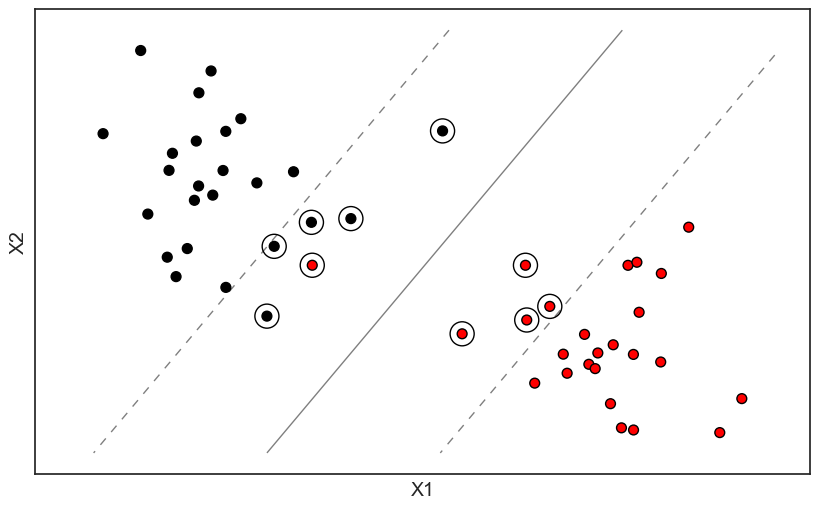

In [18]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, facecolors='none', cmap=plt.cm.flag, edgecolors='black', linewidth=1);

Everything inside the dotted line is considered a support vector as it impacts
the Maximum Margin Hyperplane's (MMH's) position.

## Check: Does scaling matter with SVMs?

## Okay, I see what happens if they a just mixed a bit, but...

What if it's not even close to being linearly separable?

## I dunno, maybe something like this...?

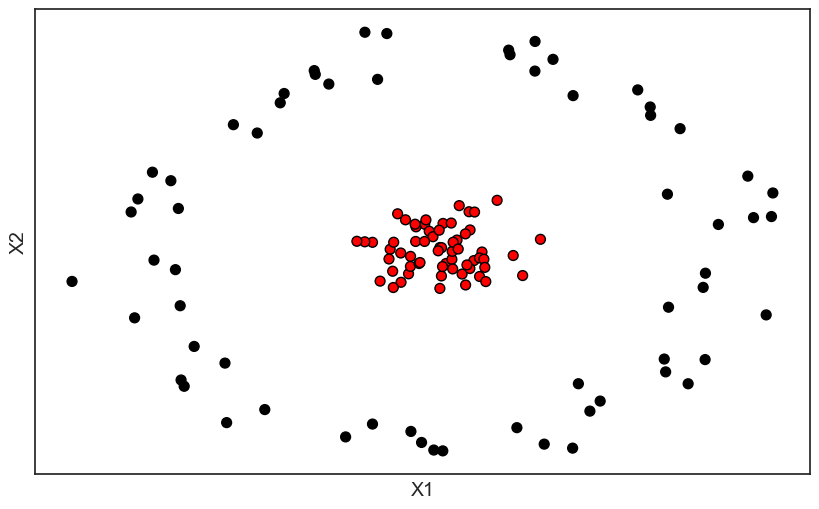

In [19]:
from sklearn.datasets.samples_generator import make_circles
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

X, y = make_circles(125, factor=.1, noise=.1)

clf = SVC(kernel='linear', C=1000).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag_r, edgecolors='black', linewidth=1)
#plot_svc_decision_function(clf);

## We just give up, right?

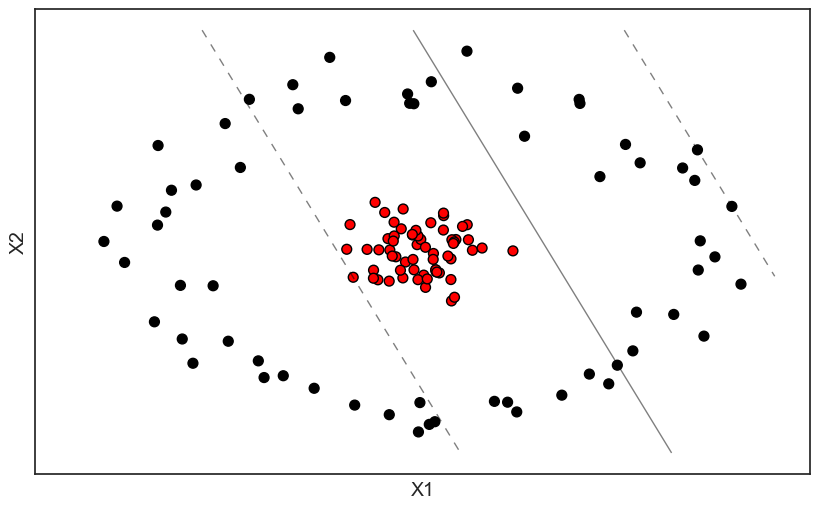

In [20]:
from sklearn.datasets.samples_generator import make_circles
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

X, y = make_circles(125, factor=.1, noise=.1)

clf = SVC(kernel='linear', C=1000).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag_r, edgecolors='black', linewidth=1)
plot_svc_decision_function(clf);

## No.

## Enter: The Colonel...

<img src="https://rottenink.files.wordpress.com/2015/11/colonel-sanders-1.jpg">

## Actually, that's the _kernel_.

## So, what is a kernel?

**A kernel is a mapping between the current dimensionality of our $x$'s and another higher dimesion.**

## Let's see an example

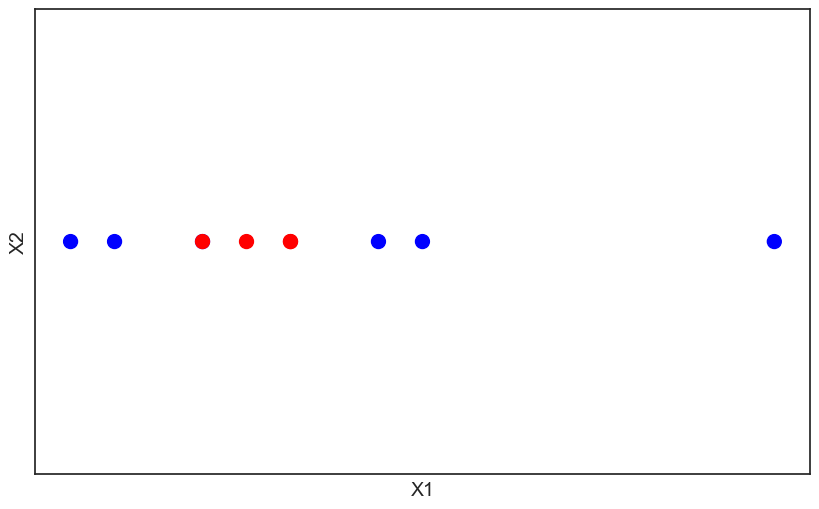

In [21]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

c = ['blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue']
X = sorted([np.random.randint(-10, 10) for x in range(10)])
y = [0 for x in range(10)]
plt.scatter(X, y, s=100, color=c);

## So I created that like this:

```python

c = ['blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue']

X = sorted([np.random.randint(-10, 10) for x in range(10)])
y = [0 for x in range(10)]
```

## So that each point looks like: $(x_i, 0)$

## What if I just squared those X values like this?

```python

c = ['blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue']
X = sorted([np.random.randint(-10, 10) for x in range(10)])
y_sq = [x**2 for x in X]
```

## Now, each point looks like this: $(x_i, x_i^2)$

## And visually, like this

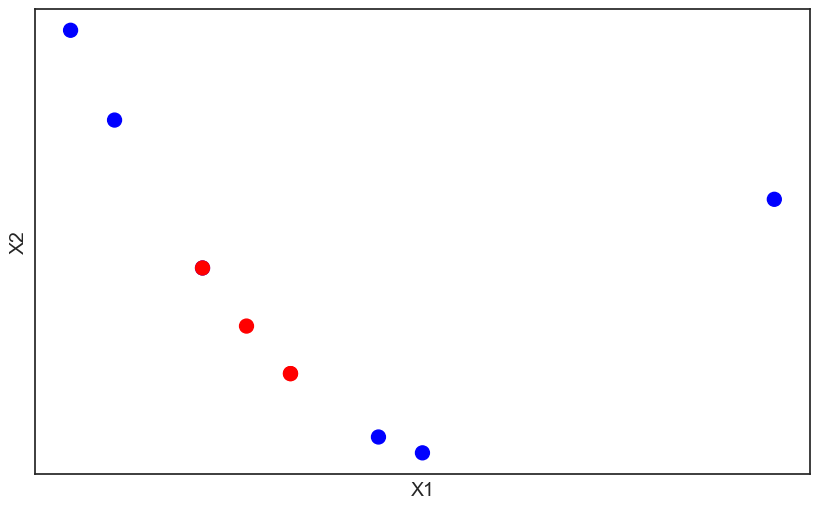

In [22]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)
y_sq = [x**2 for x in X]
plt.scatter(X, y_sq, color=c, s=100);

## But what about that gnarly circled one from before?

You can't just square it

## No, but we can use something called a "radial basis function"

## It looks like this:

Our X, y before:
```python
X, y = make_circles(125, factor=.1, noise=.1)
```

And after our X is unchanged like before, but our y:
```python
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
y = r
```

## And visually before...

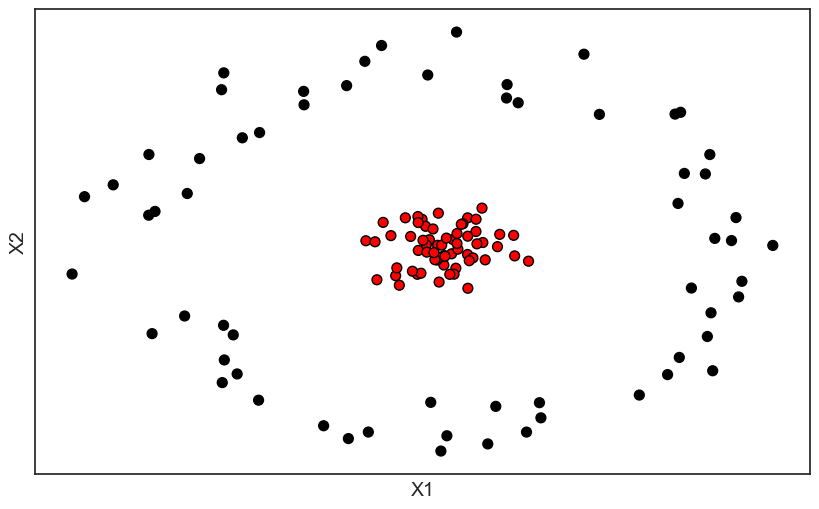

In [23]:
from sklearn.datasets.samples_generator import make_circles
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

X, y = make_circles(125, factor=.1, noise=.1)

clf = SVC(kernel='linear', C=1000).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag_r, edgecolors='black', linewidth=1)
#plot_svc_decision_function(clf);

## And after...

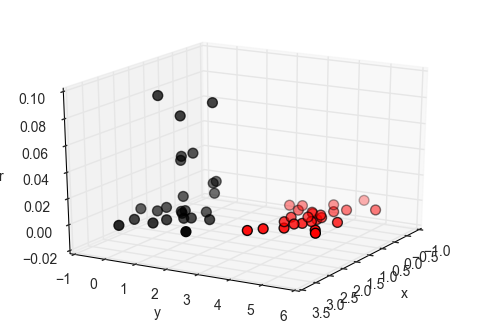

In [41]:
from IPython.html.widgets import interact
from mpl_toolkits import mplot3d

r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

clf = SVC(kernel='linear', C=1000).fit(X, y)
interact(plot_3D, elev=[-90, 90], azip=(-180, 180), figsize=(12,6));

## And finally, our decision boundary...

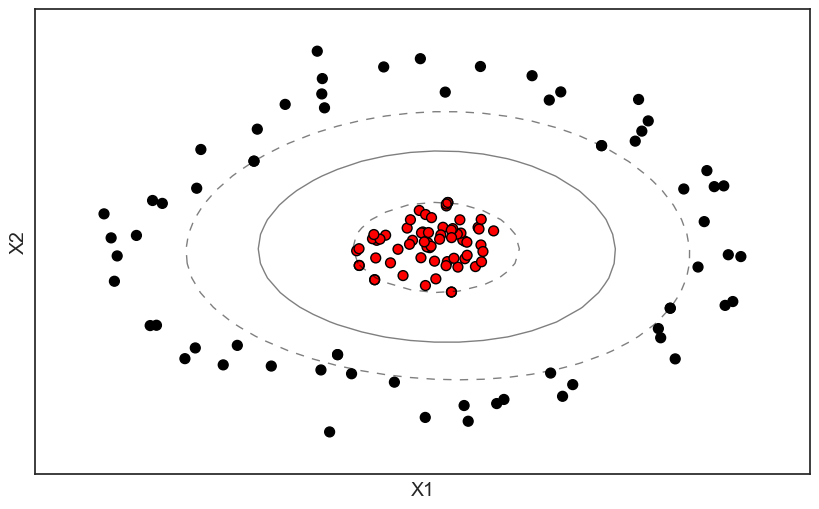

In [25]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.array([xi, yj]).reshape(1, -1))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

X, y = make_circles(125, factor=.1, noise=.1)

clf = SVC(kernel='rbf', C=10)
clf.fit(X, y)

plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag_r)
plot_svc_decision_function(clf)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=50, facecolors='none');

## What happens if we use an RBF kernel on something that is linearly separable?

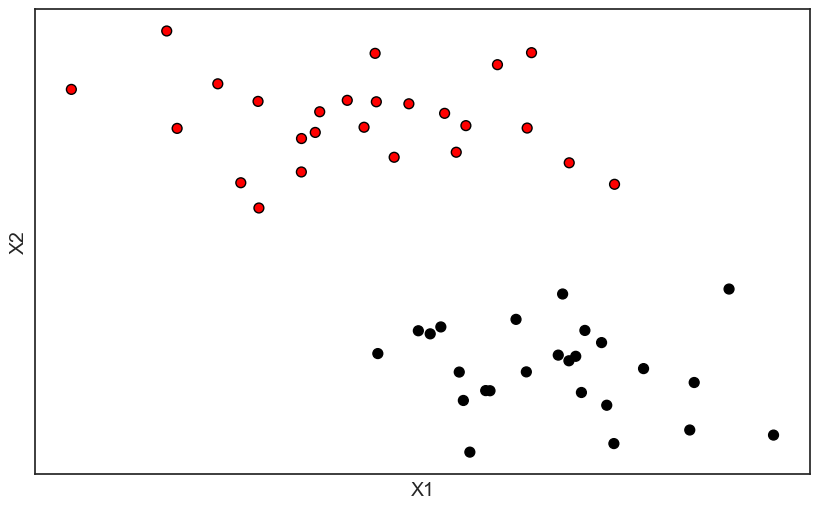

In [26]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1);

## It's not the worst thing, but can lead to overfitting

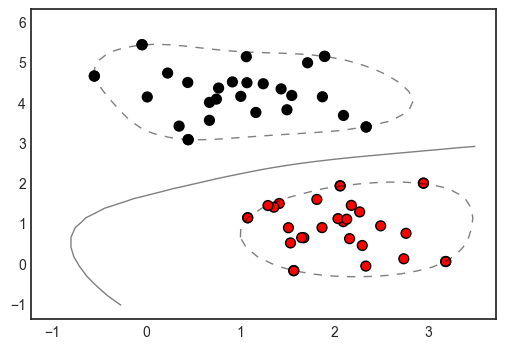

In [27]:
clf = SVC(kernel='rbf', C=10)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag_r)
plot_svc_decision_function(clf)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=50, facecolors='none');

## Exercise:

Use an SVM, GridSearchCV and the iris dataset to find an optimal model.
Make sure to search for optimal paramaters for kernel, C, 

In [61]:
iris = pd.read_csv('/Users/ajbentley/GA-DSI/curriculum/week-07/2.4-dimensionality-reduction/assets/datasets/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


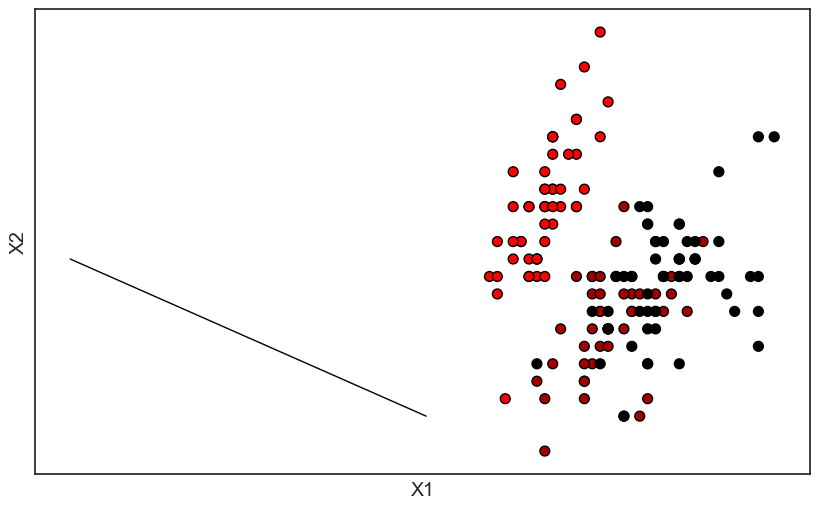

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# h = .02  # step size in the mesh

# # we create an instance of SVM and fit out data. We do not scale our
# # data since we want to plot the support vectors
# C = 1.0  # SVM regularization parameter
# svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
# lin_svc = svm.LinearSVC(C=C).fit(X, y)

# # create a mesh to plot in
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))



plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])

X = iris.data
y = iris.target

ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1);

xfit = np.linspace(-1, 3.5)

for m, b in [(-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

## Summarizing:

## Pros:
- Exceptional perfomance (state of the art until just recently - see deep learning)
- Robust to outliers
- Can work with non-linearities
- Fast to compute even on non-linear (kernel trick)
- Low risk of overfitting

## Cons:
- Blackbox
- Can be slow on big data

## Andrew Ng on when to use SVM vs. Logistic Regression

<img src="http://i.stack.imgur.com/Mx8Af.jpg">

## Additional Material

- [How MLE works](https://www.youtube.com/watch?v=RPtYRm2tboA&t=312s)
- [The Kernel trick](https://en.wikipedia.org/wiki/Kernel_method)